## LG SOC Prediction - Cycle Analysis
LG 18650HG2 Li-ion Battery Data - https://data.mendeley.com/datasets/cp3473x7xv/3

Kollmeyer, Philip; Vidal, Carlos; Naguib, Mina; Skells, Michael  (2020), “LG 18650HG2 Li-ion Battery Data and Example Deep Neural Network xEV SOC Estimator Script”, Mendeley Data, V3, doi: 10.17632/cp3473x7xv.3

In [3]:
import os
import sys
import IPython
import IPython.display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import collections
from datetime import datetime, timedelta

cell_type = "lg"
model_type = ""
base_path = '../../'

sys.path.append(base_path)
from training import utils

panasonic_data_path = base_path + 'datasets/Panasonic_18650PF'
lg_data_path = base_path + 'datasets/LG_18650HG2'
pre_trained_path = base_path + 'pre-trained/' + cell_type + '_' + model_type

resample_1hz = True
vi_averages = True

## LG Test, Train Processing

In [16]:
lg_charge_cycles = ['Charge']

discharge_cycle = ['UDDS']

lg_n10_temps = ['n10degC']
lg_n10_discharge_cycles = discharge_cycle

lg_0_temps = ['0degC']
lg_0_discharge_cycles = discharge_cycle

lg_10_temps = ['10degC']
lg_10_discharge_cycles = discharge_cycle

lg_25_temps = ['25degC']
lg_25_discharge_cycles = discharge_cycle

lg_n10_files = utils.lg_get_files(lg_data_path,
                                  lg_n10_discharge_cycles, 
                                  lg_charge_cycles,
                                  lg_n10_temps)

lg_0_files = utils.lg_get_files(lg_data_path,
                                lg_0_discharge_cycles, 
                                lg_charge_cycles,
                                lg_0_temps)

lg_10_files = utils.lg_get_files(lg_data_path,
                                 lg_10_discharge_cycles, 
                                 lg_charge_cycles,
                                 lg_10_temps)

lg_25_files = utils.lg_get_files(lg_data_path,
                                 lg_25_discharge_cycles, 
                                 lg_charge_cycles,
                                 lg_25_temps)


lg_n10, lg_n10_norm = utils.lg_create_dataset(lg_n10_files,
                                              lg_n10_discharge_cycles,
                                              lg_charge_cycles,
                                              vi_averages, 
                                              resample_1hz)

lg_0, lg_0_norm = utils.lg_create_dataset(lg_0_files, 
                                          lg_0_discharge_cycles, 
                                          lg_charge_cycles,
                                          vi_averages, 
                                          resample_1hz)

lg_10, lg_10_norm = utils.lg_create_dataset(lg_10_files,
                                            lg_10_discharge_cycles, 
                                            lg_charge_cycles,
                                            vi_averages,
                                            resample_1hz)

lg_25, lg_25_norm = utils.lg_create_dataset(lg_25_files,
                                            lg_25_discharge_cycles, 
                                            lg_charge_cycles,
                                            vi_averages, 
                                            resample_1hz)

../../datasets/LG_18650HG2/n10degC/596_UDDS.csv 123602
../../datasets/LG_18650HG2/0degC/589_UDDS.csv 140435
../../datasets/LG_18650HG2/10degC/576_UDDS.csv 148898
../../datasets/LG_18650HG2/25degC/551_UDDS.csv 159646


## LG Dataset Figures, Distribution

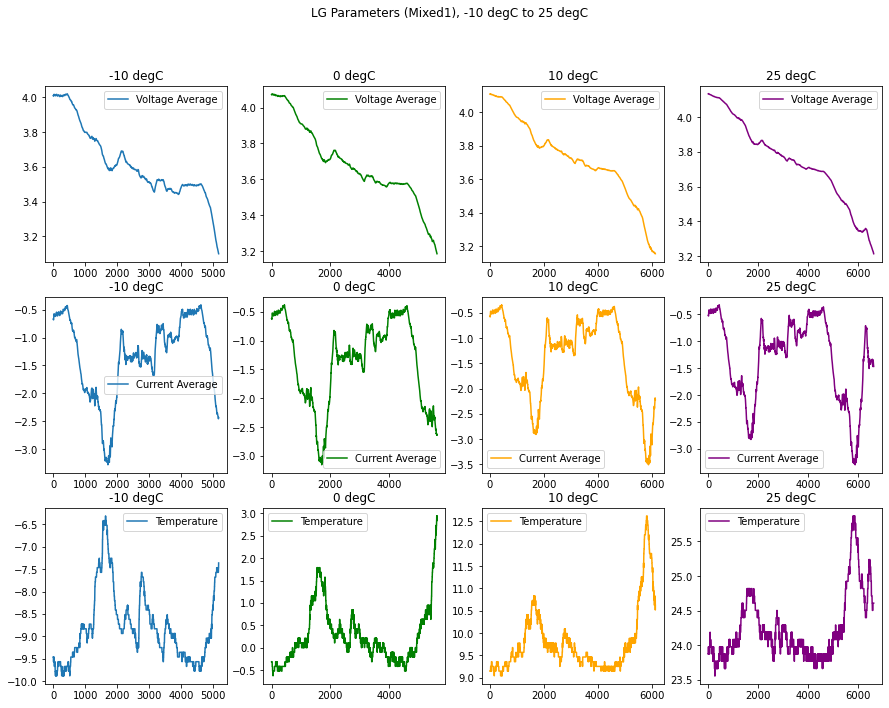

In [12]:
plot_cols = ['Voltage Average', 'Current Average', 'Temperature']

fig, axs = plt.subplots(nrows=len(plot_cols), ncols=4, figsize=(15, 11))
fig.suptitle("LG Parameters (Mixed1), -10 degC to 25 degC")

for i, col in enumerate(plot_cols):
    axs[i, 0].plot(lg_n10[col], label=f'{col}')
    axs[i, 0].set_title(f'-10 degC')
    axs[i, 0].legend()
    
    axs[i, 1].plot(lg_0[col], label=f'{col}', color="green")
    axs[i, 1].set_title(f'0 degC')
    axs[i, 1].legend()
    
    axs[i, 2].plot(lg_10[col], label=f'{col}', color="orange")
    axs[i, 2].set_title(f'10 degC')
    axs[i, 2].legend()
    
    axs[i, 3].plot(lg_25[col], label=f'{col}', color="purple")
    axs[i, 3].set_title(f'25 degC')
    axs[i, 3].legend()


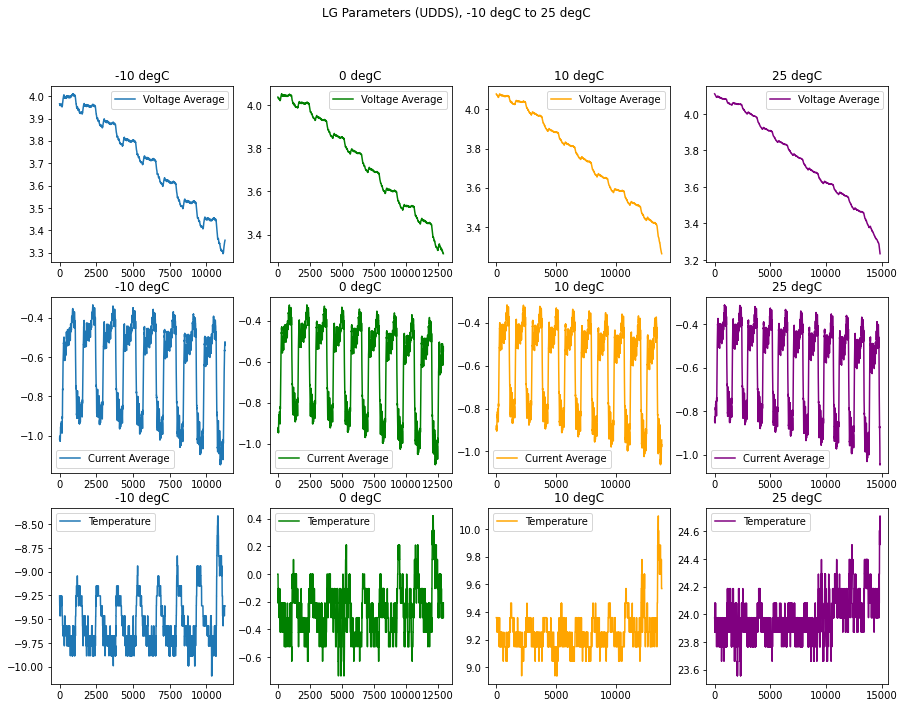

In [17]:
plot_cols = ['Voltage Average', 'Current Average', 'Temperature']

fig, axs = plt.subplots(nrows=len(plot_cols), ncols=4, figsize=(15, 11))
fig.suptitle("LG Parameters (UDDS), -10 degC to 25 degC")

for i, col in enumerate(plot_cols):
    axs[i, 0].plot(lg_n10[col], label=f'{col}')
    axs[i, 0].set_title(f'-10 degC')
    axs[i, 0].legend()
    
    axs[i, 1].plot(lg_0[col], label=f'{col}', color="green")
    axs[i, 1].set_title(f'0 degC')
    axs[i, 1].legend()
    
    axs[i, 2].plot(lg_10[col], label=f'{col}', color="orange")
    axs[i, 2].set_title(f'10 degC')
    axs[i, 2].legend()
    
    axs[i, 3].plot(lg_25[col], label=f'{col}', color="purple")
    axs[i, 3].set_title(f'25 degC')
    axs[i, 3].legend()
